# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn


import seaborn
seaborn.set_context('talk')

In [ ]:
url = 'https://raw.githubusercontent.com/EriAparicio/Diplo/main/melb_data_extended_pd_TP1.csv'
melb_df_2 = pd.read_csv(url)

In [ ]:
melb_df_2

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150,3150.0,124.026455,526.350000,1901.611111
13494,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13495,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13496,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


**Ejercicio 1.1**


In [ ]:
melb_df_2.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int',
       'zipcode_int', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
#Creamos nuevo df sin las columnas BuildingArea y YearBuilt
melb_df_3 = melb_df_2 [['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int',
       'zipcode_int', 'price', 'weekly_price', 'monthly_price']]

melb_df_3

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150,3150.0,124.026455,526.350000,1901.611111
13494,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13495,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13496,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000


**Ejercicio 1.2**


In [ ]:
# Transformamos la variable numérica "Rooms" en una variable categórica
bins = [0, 5, 10, float('inf')]  # Definimos los límites de los intervalos
labels = ['Hasta 4 habitaciones', 'Entre 5 y 10 habitaciones', 'Mas de 10 habitaciones']  # Definimos las etiquetas para cada intervalo
melb_df_3['Rooms'] = pd.cut(melb_df_3['Rooms'], bins=bins, labels=labels, right=False)

melb_df_3

<ipython-input-6-44235be45ca7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_3['Rooms'] = pd.cut(melb_df_3['Rooms'], bins=bins, labels=labels, right=False)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,postcode_int,zipcode_int,price,weekly_price,monthly_price
0,Abbotsford,85 Turner St,Hasta 4 habitaciones,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,Hasta 4 habitaciones,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,5 Charles St,Hasta 4 habitaciones,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
3,Abbotsford,40 Federation La,Hasta 4 habitaciones,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
4,Abbotsford,55a Park St,Hasta 4 habitaciones,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067,3067.0,130.624031,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,Wheelers Hill,12 Strada Cr,Hasta 4 habitaciones,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150,3150.0,124.026455,526.350000,1901.611111
13494,Williamstown,77 Merrett Dr,Hasta 4 habitaciones,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13495,Williamstown,83 Power St,Hasta 4 habitaciones,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000
13496,Williamstown,96 Verdon St,Hasta 4 habitaciones,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016,3016.0,191.094595,612.250000,2119.750000


In [ ]:
#Realizamos el enconding a las variables categoricas utilizando Dictvectorizer
#Primero convertimos el conjunto de datos en una lista de diccionarios
feature_cols = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'postcode_int',
       'zipcode_int', 'price', 'weekly_price', 'monthly_price']
feature_dict = list(melb_df_3[feature_cols].T.to_dict().values())

In [ ]:
#Importamos las bibliotecas
# Inicializamos el DictVectorizer y aplicamos la codificacion de datos

from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [ ]:
#Verificamos la nueva matriz dispersa obtenida
feature_matrix

<13498x13963 sparse matrix of type '<class 'numpy.float64'>'
	with 323952 stored elements in Compressed Sparse Row format>

In [ ]:
# Obtenemos los nombres de las caracteristicas codificadas
feature_names = vec.get_feature_names_out()

In [ ]:
#Convertimos la matriz dispersa en una matriz densa y creamos un nuevo dataframe
feature_matrix_dense = feature_matrix.toarray()

melb_df_4 = pd.DataFrame(feature_matrix_dense, columns= feature_names)
melb_df_4

,Address=1 Adelle Ct,Address=1 Airlie St,Address=1 Albion Ct,Address=1 Alexander St,Address=1 Alma St,Address=1 Ann St,Address=1 Arnot St,Address=1 Arthur St,Address=1 Ash Gr,Address=1 Ashdown Ct,...,Suburb=Yallambie,Suburb=Yarraville,Type=h,Type=t,Type=u,monthly_price,postcode_int,price,weekly_price,zipcode_int
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1901.611111,3150.0,124.026455,526.350000,3150.0
13494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0
13495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0
13496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**Ejercicio 2.1**


In [ ]:
# Agregamos al datafame anterior las columnas YearBuilt y BuildingArea
melb_df_5 = pd.concat([melb_df_4, melb_df_2[['YearBuilt', 'BuildingArea']]], axis=1)
melb_df_5

,Address=1 Adelle Ct,Address=1 Airlie St,Address=1 Albion Ct,Address=1 Alexander St,Address=1 Alma St,Address=1 Ann St,Address=1 Arnot St,Address=1 Arthur St,Address=1 Ash Gr,Address=1 Ashdown Ct,...,Type=h,Type=t,Type=u,monthly_price,postcode_int,price,weekly_price,zipcode_int,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0,1900.0,79.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0,1900.0,150.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032258,3067.0,130.624031,605.152174,3067.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1901.611111,3150.0,124.026455,526.350000,3150.0,1981.0,NaN
13494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0,1995.0,133.0
13495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0,1997.0,NaN
13496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,3016.0,191.094595,612.250000,3016.0,1920.0,157.0


**Ejercicio 2.2**

In [ ]:
#Antes de continuar con el ejercicio verifico que no existan valores nulos.
nan_values = melb_df_5.isnull().any().any()
if nan_values:
    print("El DataFrame contiene valores NaN.")
else:
    print("El DataFrame no contiene valores NaN.")

El DataFrame contiene valores NaN.


In [ ]:
#Visualizo las columnas poseen valores nulos
nan_values_columns = melb_df_5.columns[melb_df_5.isnull().any()]
print(nan_values_columns)

Index(['Car', 'CouncilArea', 'monthly_price', 'price', 'weekly_price',
       'zipcode_int', 'YearBuilt', 'BuildingArea'],
      dtype='object')


In [ ]:
#Contar valores nulos en las columnas especificadas
nan_values_columns_count = melb_df_5[nan_values_columns].isnull().sum()

print(nan_values_columns_count)

Car                61
CouncilArea      1352
monthly_price    1236
price             194
weekly_price      848
zipcode_int       194
YearBuilt        5338
BuildingArea     6413
dtype: int64


In [ ]:
#Observamos que la mayoria de los valores NaN se concentran en dos variables pincipalemnte: YearBuilt y BuildingArea, para estas
#dos columnas estimaremos sus valores. Para el resto de las variables decidimos eliminar las filas donde se encuentren
#los valores nulos ya que no es una cantidad representativa

melb_df_5.dropna(subset=['Car'],how='any',inplace=True)
melb_df_5.dropna(subset=['CouncilArea'],how='any',inplace=True)
melb_df_5.dropna(subset=['monthly_price'],how='any',inplace=True)
melb_df_5.dropna(subset=['price'],how='any',inplace=True)
melb_df_5.dropna(subset=['weekly_price'],how='any',inplace=True)
melb_df_5.dropna(subset=['zipcode_int'],how='any',inplace=True)

#Volvemos a contar los NaN para verificar
nan_values_columns_count = melb_df_5[nan_values_columns].isnull().sum()

print(nan_values_columns_count)

Car                 0
CouncilArea         0
monthly_price       0
price               0
weekly_price        0
zipcode_int         0
YearBuilt        4328
BuildingArea     5273
dtype: int64


Para estimar los valores NaN de las variables YearBuilt y BuildingArea realizamos una técnica avanzada de imputación denominada Multivariate feature imputation para esto y siguiendo la consigna vamos a aplicar una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables.

Esta tecnica no permite tener un df con variables de distinto tipo, como en este caso las variables son del mismo tipo podremos aplicar la imputación.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.impute import IterativeImputer

melb_df_6 = melb_df_5.copy(deep=True) #Realizamos una copia del df
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor()) #Indicamos el tipo de estimador que usaremos (vecinos más cercanos)
melb_df_6[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_df_6[['YearBuilt','BuildingArea']]) #Realizamos la trnasformación a las columnas cuyos valores queremos estimar.
melb_df_6.sample(10)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Address=1 Adelle Ct,Address=1 Airlie St,Address=1 Albion Ct,Address=1 Alexander St,Address=1 Alma St,Address=1 Ann St,Address=1 Arnot St,Address=1 Arthur St,Address=1 Ash Gr,Address=1 Ashdown Ct,...,Type=h,Type=t,Type=u,monthly_price,postcode_int,price,weekly_price,zipcode_int,YearBuilt,BuildingArea
11150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4125.225806,3205.0,214.846667,1226.024390,3205.0,1900.0,93.0
7840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2801.842105,3068.0,126.012987,801.315789,3068.0,1990.0,117.8
10473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1624.611111,3011.0,95.601010,441.916667,3011.0,1910.0,91.0
8001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1875.000000,3079.0,125.473684,514.900000,3079.0,1990.0,117.8
5667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3417.811111,3141.0,157.912599,1040.403670,3141.0,1970.0,47.0
10591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1217.000000,3168.0,77.427632,379.307692,3168.0,1990.0,117.8
5158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1459.625000,3073.0,273.926471,399.888889,3073.0,1970.0,97.0
7655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,870.000000,3125.0,88.147541,383.750000,3125.0,1965.0,93.6
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,980.000000,3145.0,116.267241,416.538462,3145.0,1925.0,114.0
4630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1567.500000,3044.0,98.950000,514.200000,3044.0,1950.0,166.0


**Ejercicio 2.3**

Gráfico comparando las distribuciones de datos de la columna YearBuilt sin estimar vs con el método de imputación aplicado.

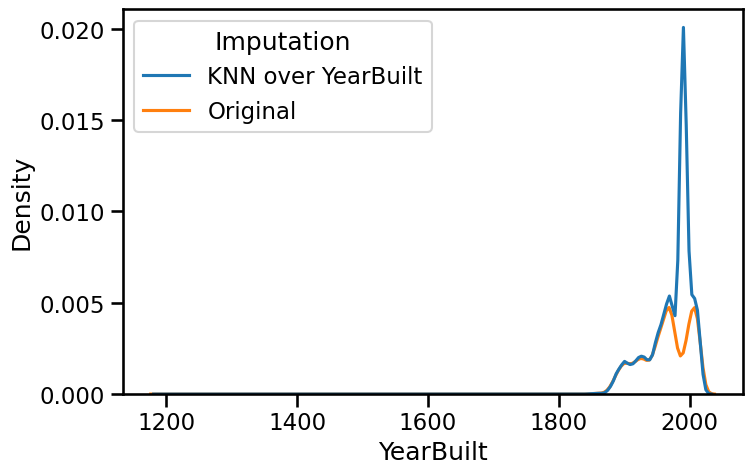

In [ ]:
mice_year_built = melb_df_6.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df_5.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Gráfico comparando las distribuciones de datos de la columna BuildingArea sin estimar vs con el método de imputación aplicado.

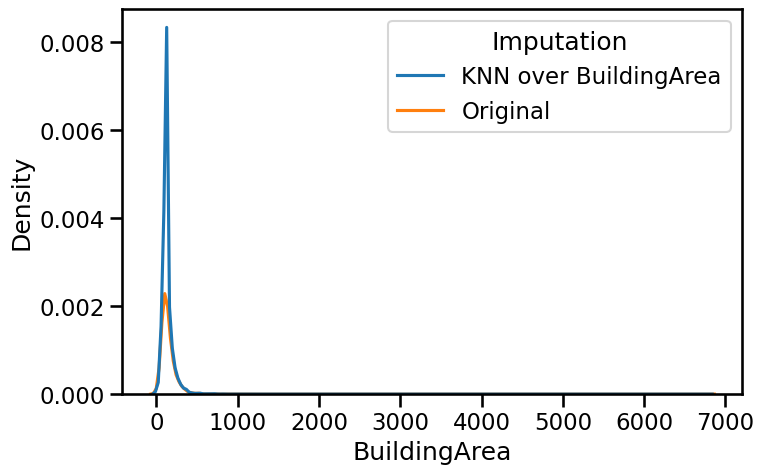

In [ ]:
mice_Building_Area = melb_df_6.BuildingArea.to_frame()
mice_Building_Area['Imputation'] = 'KNN over BuildingArea'
melb_Building_Area = melb_df_5.BuildingArea.dropna().to_frame()
melb_Building_Area['Imputation'] = 'Original'
data1 = pd.concat([mice_Building_Area, melb_Building_Area])
fig1 = plt.figure(figsize=(8, 5))
g1 = seaborn.kdeplot(data=data1, x='BuildingArea', hue='Imputation')

CONCLUSIÓN

En ambos graficos podemos observar que los datos de cada columna en cuestión, cuando se aplica el método de imputación KNN, se produce un incremento en la cantidad de información que brindan estas variables lo que ayudará potencialmente a tomar decisiones o estimaciones más certeras.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**Ejercicio 3.1**

In [ ]:
#Tamaño de df obtenido en punto anterior
melb_df_6.shape

(11123, 13965)

In [ ]:
#Convierto el df en una matriz NumPy
x_df_6 = np.asarray(melb_df_6)
x_df_6

array([[   0. ,    0. ,    0. , ..., 3067. , 1990. ,  117.8],
       [   0. ,    0. ,    0. , ..., 3067. , 1900. ,   79. ],
       [   0. ,    0. ,    0. , ..., 3067. , 1900. ,  150. ],
       ...,
       [   0. ,    0. ,    0. , ..., 3181. , 2012. ,   61.6],
       [   0. ,    0. ,    0. , ..., 3013. , 1990. ,  117.8],
       [   0. ,    0. ,    0. , ..., 3013. , 1920. ,  388.5]])

Para poder realizar el PCA es necesario estandarizar los datos porque algunas variables pueden dominar la estructura de los componentes principales. Esto se debe a que si las variables no estan en la misma escala, es posible que los resultados de PCA sean sesgados hacia las caracteristicas con mayor variacion.
En sinteis al escalar los datos nos aseguramos que todas las caracteristicas tengan el mismo peso en el calculo de los componentes principales y se facilite la comparación y el análisis de los datos.


In [ ]:
from sklearn.preprocessing import MinMaxScaler #Aplico un scaler de tipo MinMax donde Min=-1 y Max=1
scaler = MinMaxScaler(feature_range=(-1, 1)) #A los datos de la variable se le asigna un valor entre 1 y -1 mantenimiento la ponderación de cada uno.
scaled_x_df_6 = scaler.fit_transform(x_df_6)
scaled_x_df_6


array([[-1.        , -1.        , -1.        , ..., -0.86284545,
         0.93187348, -0.96530702],
       [-1.        , -1.        , -1.        , ..., -0.86284545,
         0.71289538, -0.97673391],
       [-1.        , -1.        , -1.        , ..., -0.86284545,
         0.71289538, -0.95582388],
       ...,
       [-1.        , -1.        , -1.        , ..., -0.62947799,
         0.98540146, -0.98185834],
       [-1.        , -1.        , -1.        , ..., -0.97338792,
         0.93187348, -0.96530702],
       [-1.        , -1.        , -1.        , ..., -0.97338792,
         0.76155718, -0.88558386]])

In [ ]:
#Aplicamos PCA a nuestra matriz escalada

from sklearn.decomposition import PCA

n = min(20, melb_df_6.shape[0])
pca = PCA(n_components=n) #Indicamos que queremos extraer 20 componentes principales
pca.fit(scaled_x_df_6)

print("Componentes principales")
print(pca.components_)
print("Explained variance: ") #Es un vector que contiene la varianza explicada por cada componente principal en orden descendente
print(pca.explained_variance_)
print("Explained variance ratio") # Es un vector que contiene la proporción de varianza explicada por cada componente principal en orden descendente.
print(pca.explained_variance_ratio_)


Componentes principales
[[-6.79960290e-05  1.44844094e-19  7.95115196e-18 ...  6.02762443e-02
   5.03816230e-03 -1.00913176e-03]
 [-1.18414823e-04  4.74469633e-18  7.60808860e-17 ... -2.30785940e-02
   1.04752009e-02 -4.88962026e-03]
 [-7.38954893e-05 -4.52501399e-17 -6.85486971e-16 ... -4.24847484e-02
   9.10415898e-03 -1.39119892e-03]
 ...
 [-6.91469106e-05  4.77834371e-17  4.45430827e-16 ...  2.15077668e-02
  -6.58272151e-03 -6.46145580e-04]
 [ 1.80796507e-05 -6.65733434e-16  1.19894281e-16 ...  9.90151281e-03
   1.00594528e-02 -1.49457899e-04]
 [ 1.21043584e-03  2.75521406e-16  6.45663639e-16 ...  3.55867821e-03
  -4.61176183e-03  6.80609386e-04]]
Explained variance: 
[2.05719078 1.53991967 1.3256072  1.15285374 0.7124109  0.55869953
 0.50999285 0.49830197 0.47704706 0.43971889 0.39737882 0.37231704
 0.35673519 0.3499925  0.33362879 0.32565374 0.29944235 0.26704503
 0.25469094 0.2381862 ]
Explained variance ratio
[0.07457653 0.0558246  0.04805543 0.04179283 0.02582606 0.02025377
 0

In [ ]:
#Obtengo la matriz transformada en donde los datos de scaled_x_df_6 se proyectan en el espacio de los
#componentes principales seleccionados, lo que reduce la dimensionalidad del conjunto de datos.
proyected_scaled_x_df_6 = pca.transform(scaled_x_df_6)
print("Tamaño de matriz reducida")
print(proyected_scaled_x_df_6.shape)
print("Matriz reducida")
print(proyected_scaled_x_df_6)

Tamaño de matriz reducida
(11123, 20)
Matriz reducida
[[-1.41537158  0.45493432 -1.28062384 ... -0.95177903 -0.40086277
   0.04357852]
 [-1.42570073  0.4788413  -1.27121776 ... -0.94320868 -0.38096183
  -0.01670519]
 [-1.2946412   0.97347664 -0.04873899 ... -0.94481702 -0.44172849
   0.07670487]
 ...
 [ 2.69318248  0.96663132  0.90819133 ... -0.33640024  0.14709445
  -0.2140083 ]
 [-0.95603009 -0.65747928  2.29753127 ...  0.73698987  0.39176312
   0.96483645]
 [-1.01770691 -1.16975964  2.03522728 ...  0.44470703 -0.3699368
   1.23165554]]


**Ejercicio 3.2**

[0.07457653 0.13040113 0.17845656 0.22024939 0.24607545 0.26632922
 0.28481729 0.30288155 0.32017529 0.33611582 0.35052145 0.36401855
 0.37695078 0.38963858 0.40173317 0.41353865 0.42439393 0.43407475
 0.44330771 0.45194235]


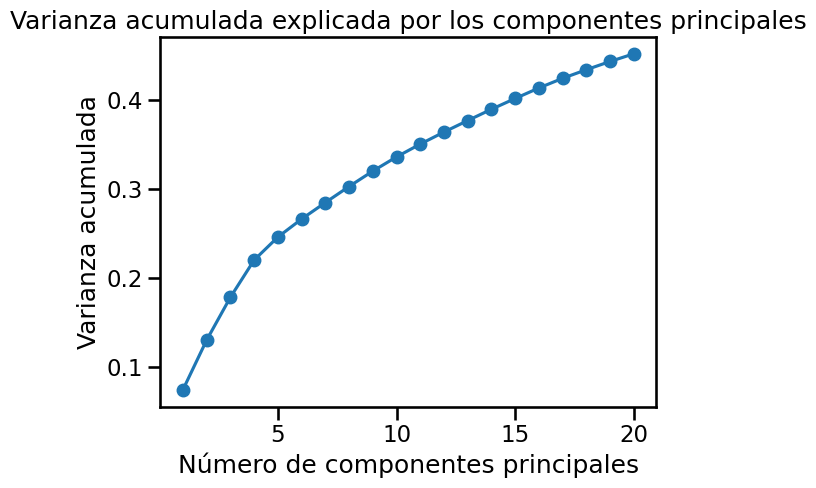

In [ ]:
# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la suma acumulativa de la varianza explicada
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)
#Al sumar los valores en explained_variance_ratio_, obtienes la cantidad acumulada de varianza explicada por los componentes principales seleccionados.

# Graficar la varianza acumulada
plt.plot(range(1, n+1), cumulative_variance, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.title('Varianza acumulada explicada por los componentes principales')
plt.show()

**Ejercicio 3.3**


In [ ]:
#Observando el grafico de la varianza acumulada, observamos que en los primeros 5 componentes principales se
#concentra la mayor proporcion, por ende tomamos las primeras 5 columnas de la matriz reducida y se la agregamos
#al conjunto de datos

melb_df_6[['pca1_component', 'pca2_component','pca3_component','pca4_component','pca5_component',]] = proyected_scaled_x_df_6[:,:5]
melb_df_6

,Address=1 Adelle Ct,Address=1 Airlie St,Address=1 Albion Ct,Address=1 Alexander St,Address=1 Alma St,Address=1 Ann St,Address=1 Arnot St,Address=1 Arthur St,Address=1 Ash Gr,Address=1 Ashdown Ct,...,price,weekly_price,zipcode_int,YearBuilt,BuildingArea,pca1_component,pca2_component,pca3_component,pca4_component,pca5_component
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.624031,605.152174,3067.0,1990.0,117.80,-1.415372,0.454934,-1.280624,-0.191101,-0.291446
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.624031,605.152174,3067.0,1900.0,79.00,-1.425701,0.478841,-1.271218,-0.204194,-0.283274
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.624031,605.152174,3067.0,1900.0,150.00,-1.294641,0.973477,-0.048739,1.760880,-0.249594
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.624031,605.152174,3067.0,1990.0,117.80,-1.182696,0.823134,-0.255711,1.890610,-0.205202
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.624031,605.152174,3067.0,2014.0,142.00,-1.468118,1.032535,-0.345398,1.645515,-0.551944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191.094595,612.250000,3016.0,1967.0,35.64,0.352233,1.268851,3.023731,-0.071460,-0.027771
12143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,191.094595,612.250000,3016.0,1990.0,117.80,-1.251494,-1.186397,1.043248,-1.067000,-0.453360
12144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,148.169565,868.148148,3181.0,2012.0,61.60,2.693182,0.966631,0.908191,0.832170,0.049416
12146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,135.609756,923.571429,3013.0,1990.0,117.80,-0.956030,-0.657479,2.297531,0.858873,-0.536524


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# Guardamos el conjunto de datos procesados en un archivo csv

melb_df_6.to_csv('resultado.csv', index=False)

KeyboardInterrupt: ignored

In [ ]:
from google.colab import files
files.download('resultado.csv')

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de
     publicaciones de la plataforma AirBnB en el mismo código
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
